In [1]:
import pandas as pd
import transformers
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import nltk
from nlp_utils import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sn

In [2]:
#BART_classifier = transformers.pipeline('zero-shot-classification', model='facebook/bart-large-mnli')
#mDeBERTa_classifier = transformers.pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli")
tokenizer = AutoTokenizer.from_pretrained("AyoubChLin/Bart-MNLI-CNN_news")

model = AutoModelForSequenceClassification.from_pretrained("AyoubChLin/Bart-MNLI-CNN_news")
classifier = transformers.pipeline(
    "zero-shot-classification",
    model=model,
    tokenizer=tokenizer,
    device='cpu'
)

In [3]:
df=pd.read_csv('datasets/US_stocks.csv')

#df=df.drop(['publish_date'], axis=1)
#df=df[df["headline_category"].str.contains("unkown") == False]
df.shape[0]

3144

In [4]:
labels = df['Industry Group'].unique()
sentences = df['Description'].head(n=500)
df=df.head(n=500)
#sentences = bart(sentences,150)



In [5]:
#prediction = [BART_classifier(sentence, labels, multi_label=False) for sentence in sentences]

In [6]:
#predicted_label=[]
#for i in range(df.shape[0]):    
#    predicted_label.append(prediction[i]['labels'][0])
#
#df['Predicted Label'] = predicted_label
#
#df.head(n=1)

In [7]:
#prediction = [mDeBERTa_classifier(sentence, labels, multi_label=True) for sentence in sentences]
prediction = [classifier(sentence, labels, multi_label=True) for sentence in sentences]

In [ ]:
predicted_label=[prediction[i]['labels'][0] for i in range(df.shape[0])]
df['Predicted Label'] = predicted_label
df.head(n=10)

,Ticker,Description,Company Name,Sector,Industry Group,Industry,Sub-Industry,Comment,Predicted Label
0,CTVA,"Corteva, Inc. is a global provider of seed and...",CORTEVA INC,Materials,Materials,Chemicals,Fertilizers & Agricultural Chemicals,"Producers of fertilizers, pesticides, potash o...",Technology Hardware & Equipment
1,ALCO,"Alico, Inc. is an agribusiness and land manage...",ALICO INC,Consumer Staples,"Food, Beverage & Tobacco",Food Products,Agricultural Products,Producers of agricultural products. Includes c...,Household & Personal Products
2,LMNR,Limoneira Company is primarily an agribusiness...,LIMONEIRA CO,Consumer Staples,"Food, Beverage & Tobacco",Food Products,Agricultural Products,Producers of agricultural products. Includes c...,Real Estate
3,SANW,S&W Seed Company (S&W) is a multi-crop and mid...,S&W SEED CO,Consumer Staples,"Food, Beverage & Tobacco",Food Products,Agricultural Products,Producers of agricultural products. Includes c...,Insurance
4,TRC,Tejon Ranch Co. is a diversified real estate d...,TEJON RANCH CO,Real Estate,Real Estate,Real Estate Management & Development,Diversified Real Estate Activities,Companies engaged in a diverse spectrum of rea...,Real Estate
5,CALM,"Cal-Maine Foods, Inc. is a producer and distri...",CAL-MAINE FOODS INC,Consumer Staples,"Food, Beverage & Tobacco",Food Products,Packaged Foods & Meats,Producers of packaged foods including dairy pr...,Retailing
6,BV,"BrightView Holdings, Inc. is a commercial land...",BRIGHTVIEW HOLDINGS,Industrials,Commercial & Professional Services,Commercial Services & Supplies,Environmental & Facilities Services,Companies providing environmental and faciliti...,Commercial & Professional Services
7,CLF,Cleveland-Cliffs Inc. is an integrated mining ...,CLEVELAND-CLIFFS INC,Materials,Materials,Metals & Mining,Steel,Producers of iron and steel and related produc...,Automobiles & Components
8,FCX,Freeport-McMoRan Inc. (FCX) is a mining compan...,FREEPORT-MCMORAN INC,Materials,Materials,Metals & Mining,Copper,Companies involved primarily in copper ore min...,Materials
9,XPL,Solitario Zinc Corp.(Solitario) is a natural r...,SOLITARIO ZINC CORP,Materials,Materials,Metals & Mining,Diversified Metals & Mining,Companies engaged in the diversified productio...,Materials


<Axes: >

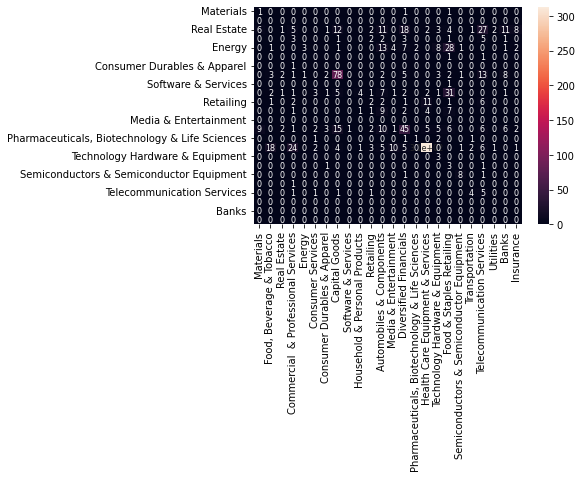

In [ ]:
cm=confusion_matrix(df['Industry Group'],df['Predicted Label'])
cm=pd.DataFrame(cm,index = [i for i in labels],
                  columns = [i for i in labels])
sn.heatmap(cm, annot=True,annot_kws={"size": 8})

In [ ]:
accuracy = accuracy_score(df['Industry Group'], df['Predicted Label'])
precision = precision_score(df['Industry Group'], df['Predicted Label'],average='weighted')
recall = recall_score(df['Industry Group'], df['Predicted Label'],average='weighted')
f1 = f1_score(df['Industry Group'], df['Predicted Label'],average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.479
Precision: 0.6421800733967075
Recall: 0.479
F1 Score: 0.5052083047046505


C:\Users\hugor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
